In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import matplotlib
import copy
import cv2
# matplotlib.font_manager._rebuild()
# plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
%matplotlib inline

In [2]:
import sys
sys.path.append("/notebooks/nb_IEEE/opmap/")

In [3]:
import opmap
from opmap.rawCam import RawCam
from opmap.vmemMap import VmemMap
from opmap.apdMap import APDMap
from opmap.phaseMapHilbert import PhaseMapHilbert as PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap

In [ ]:
pmap = PhaseMap.load('../nb_extra/20210227/20201117-1/op/C001H001S0014/pmap_op.npy')
pvmap = PhaseVarianceMap(pmap)

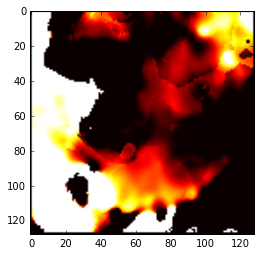

In [7]:
pvmap.showFrame(200)

In [4]:
def FFT(vmem_1d, N, dt, fc_low=None, fc_high=None):
    fq = np.linspace(0, 1.0/dt, N)
    F = np.fft.fft(vmem_1d)
    if fc_low is not None:
        F[(fq <= fc_low)] = 0
    if fc_high is not None:
        F[(fq >= fc_high)] = 0
    
    F_abs = np.abs(F)
    F_abs_amp = F_abs/N
#     F_abs_amp[0] = F_abs_amp[0]/2
    F_abs_amp[0] = 0
    
    F_ifft = np.fft.ifft(F)
    F_ifft_real = F_ifft.real * 2
    
    return F_ifft_real

In [5]:
def isochronal(pmap, threshold):
    contour = np.zeros_like(pmap.data)

    for i in range(contour.shape[1]):
        for j in range(contour.shape[2]):        
            if pmap.roi[i,j] == 1:
                counter = 0
                for time in range(contour.shape[0]):
                    if time == 0:
                        pass
                    elif ((pmap.data[time-1, i, j] < threshold) * (pmap.data[time, i, j] > threshold)) == 1:
                        counter = 0

                    contour[time, i, j] = counter
                    counter += 1
                
    return contour

In [6]:
def normalize(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

## 旋回興奮 APD50

In [35]:
analysis_path = [["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0024/", 28000, 29000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0010/", 28000, 29000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"]
                ]

### 20181218-1/C001H001S0024

In [26]:
analysis_info = analysis_path[0]

In [27]:
data_path = analysis_info[0]
print(data_path)

start = analysis_info[1]
end = analysis_info[2]

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))

if not os.path.exists(save_path):
    os.makedirs(save_path)

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
vmem = VmemMap(raw)

roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)

"""
for i in range(5):
    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig(os.path.join(save_path, "%s.png"%i))
    plt.close()
"""

/mnt/Jalife/ExperimentData/20181218-1/C001H001S0024/


'\nfor i in range(5):\n    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")\n    plt.xticks([])\n    plt.yticks([])\n    plt.colorbar()\n    plt.savefig(os.path.join(save_path, "%s.png"%i))\n    plt.close()\n'

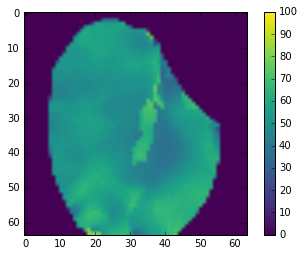

In [34]:
plt.imshow(apd.data[1]*2, vmin=0, vmax=100, cmap="viridis")
plt.colorbar()

### 20181220-1/C001H001S0010

In [36]:
analysis_info = analysis_path[1]

In [37]:
data_path = analysis_info[0]
print(data_path)

start = analysis_info[1]
end = analysis_info[2]

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))

if not os.path.exists(save_path):
    os.makedirs(save_path)

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
vmem = VmemMap(raw)

roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)

"""
for i in range(5):
    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig(os.path.join(save_path, "%s.png"%i))
    plt.close()
"""

/mnt/Jalife/ExperimentData/20181220-1/C001H001S0010/


'\nfor i in range(5):\n    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")\n    plt.xticks([])\n    plt.yticks([])\n    plt.colorbar()\n    plt.savefig(os.path.join(save_path, "%s.png"%i))\n    plt.close()\n'

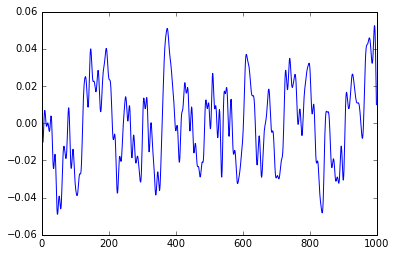

In [52]:
plt.plot(vmem.data[:, 42,140])

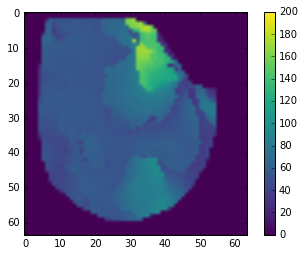

In [49]:
plt.imshow(apd.data[1]*2, vmin=0, vmax=200, cmap="viridis")
plt.colorbar()

### 20181220-1/C001H001S0014

In [55]:
analysis_info = ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0014/", 29000, 30000,
                 "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"]

In [56]:
data_path = analysis_info[0]
print(data_path)

start = analysis_info[1]
end = analysis_info[2]

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))

if not os.path.exists(save_path):
    os.makedirs(save_path)

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
vmem = VmemMap(raw)

roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)

"""
for i in range(5):
    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig(os.path.join(save_path, "%s.png"%i))
    plt.close()
"""

/mnt/Jalife/ExperimentData/20181220-1/C001H001S0014/


'\nfor i in range(5):\n    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")\n    plt.xticks([])\n    plt.yticks([])\n    plt.colorbar()\n    plt.savefig(os.path.join(save_path, "%s.png"%i))\n    plt.close()\n'

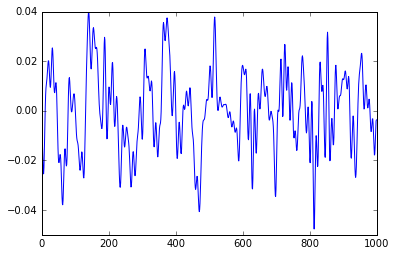

In [57]:
plt.plot(vmem.data[:, 42,140])

### 20181220-1/C001H001S0015

In [58]:
analysis_info = ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0015/", 29000, 30000,
                 "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"]

In [59]:
data_path = analysis_info[0]
print(data_path)

start = analysis_info[1]
end = analysis_info[2]

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))

if not os.path.exists(save_path):
    os.makedirs(save_path)

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
vmem = VmemMap(raw)

roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)

"""
for i in range(5):
    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig(os.path.join(save_path, "%s.png"%i))
    plt.close()
"""

/mnt/Jalife/ExperimentData/20181220-1/C001H001S0015/


'\nfor i in range(5):\n    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")\n    plt.xticks([])\n    plt.yticks([])\n    plt.colorbar()\n    plt.savefig(os.path.join(save_path, "%s.png"%i))\n    plt.close()\n'

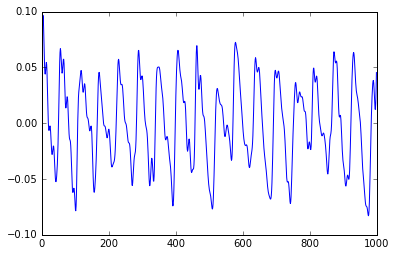

In [61]:
plt.plot(vmem.data[:, 42,140])

### 20181220-1/C001H001S0022

In [62]:
analysis_info = ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/", 29000, 30000,
                 "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"]

In [63]:
data_path = analysis_info[0]
print(data_path)

start = analysis_info[1]
end = analysis_info[2]

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))

if not os.path.exists(save_path):
    os.makedirs(save_path)

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
vmem = VmemMap(raw)

roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)

"""
for i in range(5):
    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig(os.path.join(save_path, "%s.png"%i))
    plt.close()
"""

/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/


'\nfor i in range(5):\n    plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")\n    plt.xticks([])\n    plt.yticks([])\n    plt.colorbar()\n    plt.savefig(os.path.join(save_path, "%s.png"%i))\n    plt.close()\n'

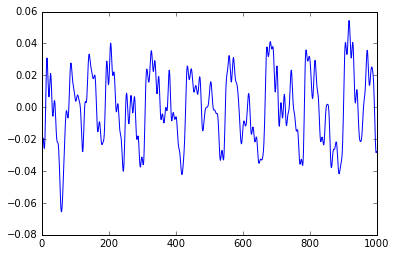

In [64]:
plt.plot(vmem.data[:, 42,140])

### APD50 before cooling

In [65]:
analysis_path = [["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0014.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0014/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0014.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0021/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0007/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0008/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0009/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0011/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0017/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0018/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0022/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0024/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0026/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0028/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0007/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0009/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0010/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0012/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0014/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0015/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0018/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0020/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/", 6000, 7000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"]
                ]

In [ ]:
for analysis_info in analysis_path:
    data_path = analysis_info[0]
    print(data_path)
    
    start = analysis_info[1]
    end = analysis_info[2]
    
    date = data_path.split('/')[-3]
    session_name = data_path.split('/')[-2]
    save_path = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', 'APD50/%s/%s/%s-%s' % (date, session_name, start, end))
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)
    vmem = VmemMap(raw)
    
    roi_png = cv2.imread(analysis_info[3], cv2.IMREAD_GRAYSCALE)
    roi_png = roi_png/255.0
    
    vmem.roi = roi_png
    vmem.data = vmem.data * vmem.roi
    
    for i in range(vmem.data.shape[1]):
        for j in range(vmem.data.shape[2]):
            vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)
            
    vmem.smooth(size=9)
    
    apd = APDMap(vmem, max_beats=5, thre_up=0.9, thre_down=0.5)
    
    for i in range(5):
        plt.imshow(apd.data[i]*2, vmin=0, vmax=100, cmap="viridis")
        plt.xticks([])
        plt.yticks([])
        plt.colorbar()
        plt.savefig(os.path.join(save_path, "%s.png"%i))
        plt.close()

/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/
